In [1]:
# we import libraries which we want in project to clean and analysis and visualize
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

In [9]:
# read data from csv file and view head 
sales_data= pd.read_csv('Desktop/supersales.csv')
sales_data.head(5)


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [13]:
#knowing shape of data
sales_data.shape


(9800, 18)

In [25]:
# return some information about data
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [21]:
# all data columns 
sales_data.columns 

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales'],
      dtype='object')

In [15]:
# to get suammary about data 'numeric'
sales_data.describe()

,Row ID,Postal Code,Sales
count,9800.000000,9789.000000,9800.000000
mean,4900.500000,55273.322403,230.769059
std,2829.160653,32041.223413,626.651875
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,58103.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


In [19]:
# get suamary about data 'object'
sales_data.describe(include=['object'])


,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name
count,9800,9800,9800,9800,9800,9800,9800,9800,9800,9800,9800,9800,9800,9800,9800
unique,4922,1230,1326,4,793,793,3,1,529,49,4,1861,3,17,1849
top,CA-2018-100111,05/09/2017,26/09/2018,Standard Class,WB-21850,William Brown,Consumer,United States,New York City,California,West,OFF-PA-10001970,Office Supplies,Binders,Staple envelope
freq,14,38,34,5859,35,35,5101,9800,891,1946,3140,19,5909,1492,47


In [ ]:
#Data cleaning¶ and analyzing
#In this step, I performed the following tasks to ensure the dataset was clean and ready for analysis:

#Outlier Analysis: After analysis, I determined that there were no significant outliers in the dataset.

#Data Type Verification: I verified the data types and made necessary adjustments. The Order Date and Ship 
#Date columns were converted to datetime format. Additionally, categorical columns such as Ship Mode, Category, 
#Sub-Category, and Segment were converted to the appropriate categorical data type for optimized processing.



In [31]:
# to know if there null value or not in each column 
null_values= sales_data.isnull().sum()
null_values

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [ ]:
## we noticed there are a missing value in only 'postal code' column

In [51]:
# we noticed that missing value percentage is small only 1%
missing_percentage_postal_code= (sales_data['Postal Code'].isnull().sum()/len(sales_data['Postal Code']))*100
missing_percentage_postal_code



0.11224489795918367

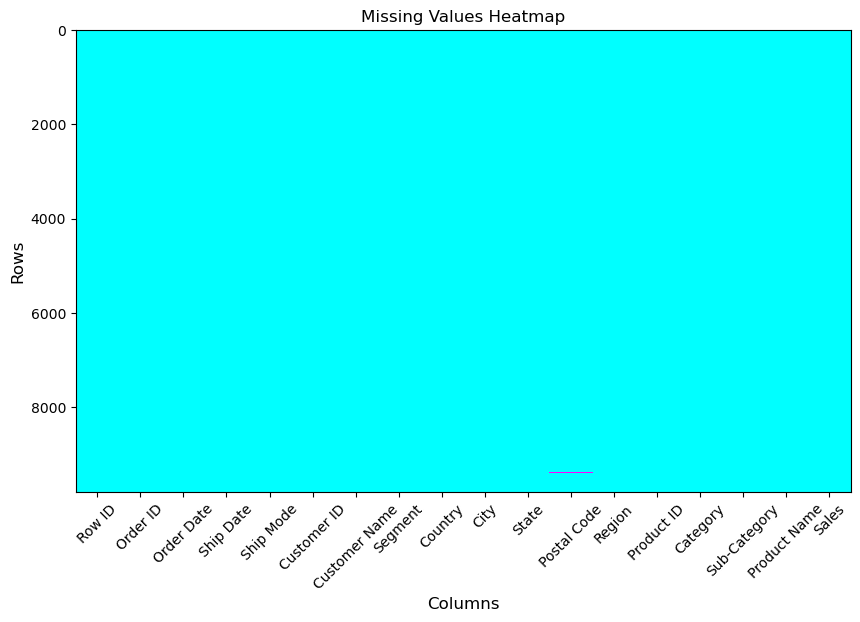

In [92]:
plt.figure(figsize=(10, 6))
plt.imshow(sales_data.isnull(), aspect='auto', cmap='cool', interpolation='none')
plt.xticks(ticks=range(sales_data.shape[1]), labels=sales_data.columns, rotation=45)
plt.title('Missing Values Heatmap', fontsize=12)
plt.xlabel('Columns', fontsize=12)
plt.ylabel('Rows', fontsize=12)
plt.show()


In [98]:
# return rows with missing data 
rows_with_missing= sales_data[sales_data.isnull().any(axis=1)]
rows_with_missing

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
2234,2235,CA-2018-104066,05/12/2018,10/12/2018,Standard Class,QJ-19255,Quincy Jones,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10001013,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.03
5274,5275,CA-2016-162887,07/11/2016,09/11/2016,Second Class,SV-20785,Stewart Visinsky,Consumer,United States,Burlington,Vermont,NaN,East,FUR-CH-10000595,Furniture,Chairs,Safco Contoured Stacking Chairs,715.20
8798,8799,US-2017-150140,06/04/2017,10/04/2017,Standard Class,VM-21685,Valerie Mitchum,Home Office,United States,Burlington,Vermont,NaN,East,TEC-PH-10002555,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75
9146,9147,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.98
9147,9148,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-AR-10003477,Office Supplies,Art,4009 Highlighters,8.04
9148,9149,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-ST-10001526,Office Supplies,Storage,Iceberg Mobile Mega Data/Printer Cart,1564.29
9386,9387,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10000157,Office Supplies,Paper,Xerox 191,79.92
9387,9388,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,12.28
9388,9389,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-AP-10000828,Office Supplies,Appliances,Avanti 4.4 Cu. Ft. Refrigerator,542.94
9389,9390,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-EN-10001509,Office Supplies,Envelopes,Poly String Tie Envelopes,2.04


In [ ]:
# we notced all nan value in postol code his state vermont

In [100]:
# postol code in vermont not decalre
vermont_rows = sales_data.groupby('State').get_group('Vermont')
vermont_rows


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
2234,2235,CA-2018-104066,05/12/2018,10/12/2018,Standard Class,QJ-19255,Quincy Jones,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10001013,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.03
5274,5275,CA-2016-162887,07/11/2016,09/11/2016,Second Class,SV-20785,Stewart Visinsky,Consumer,United States,Burlington,Vermont,NaN,East,FUR-CH-10000595,Furniture,Chairs,Safco Contoured Stacking Chairs,715.20
8798,8799,US-2017-150140,06/04/2017,10/04/2017,Standard Class,VM-21685,Valerie Mitchum,Home Office,United States,Burlington,Vermont,NaN,East,TEC-PH-10002555,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75
9146,9147,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.98
9147,9148,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-AR-10003477,Office Supplies,Art,4009 Highlighters,8.04
9148,9149,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-ST-10001526,Office Supplies,Storage,Iceberg Mobile Mega Data/Printer Cart,1564.29
9386,9387,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10000157,Office Supplies,Paper,Xerox 191,79.92
9387,9388,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,12.28
9388,9389,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-AP-10000828,Office Supplies,Appliances,Avanti 4.4 Cu. Ft. Refrigerator,542.94
9389,9390,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-EN-10001509,Office Supplies,Envelopes,Poly String Tie Envelopes,2.04


In [104]:
sales_data_cleaned = sales_data.dropna()
# Check for missing values after cleaning
missing_values_cleaned = sales_data_cleaned.isnull().sum()
# Display the missing values count (should be 0 after dropna)
print(missing_values_cleaned)
# Ensure the cleaned DataFrame is independent of the original
sales_data_cleaned = sales_data_cleaned.copy()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64


In [108]:
# check if rhere duplicte values and we noticed there is no 
duplicates= sales_data_cleaned.duplicated()
print(duplicates.sum())


0


In [114]:
# know data types of columns 
sales_data_cleaned.dtypes

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code      float64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
dtype: object

In [118]:
sales_data_cleaned.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [122]:
# we convert date from variables to formate using function 'to_date_time'
date_columns = ['Order Date', 'Ship Date']
sales_data_cleaned[date_columns] = sales_data_cleaned[date_columns].apply(
    pd.to_datetime, dayfirst=True, errors='coerce')
sales_data_cleaned.dtypes


Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code             float64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
dtype: object

In [128]:
#we changed this columns to 'ctegory data type ' to peter performance 
category_columns= ['Segment','Category','Sub-Category','Ship Mode']
for col in category_columns:
    sales_data_cleaned[col]=sales_data_cleaned[col].astype('category')
sales_data_cleaned.dtypes


Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode              category
Customer ID              object
Customer Name            object
Segment                category
Country                  object
City                     object
State                    object
Postal Code             float64
Region                   object
Product ID               object
Category               category
Sub-Category           category
Product Name             object
Sales                   float64
dtype: object

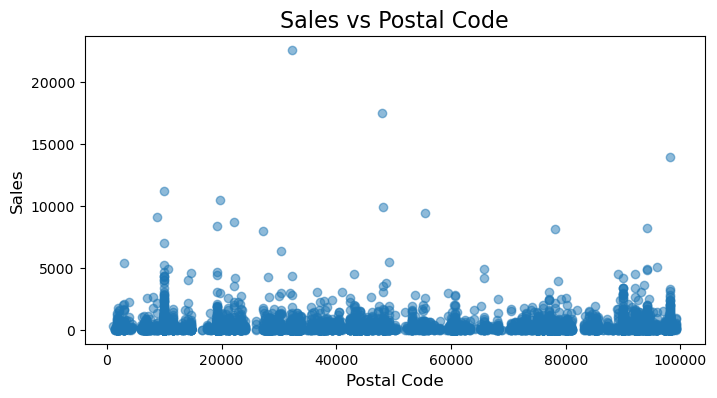

In [160]:
plt.figure(figsize=(8, 4))
plt.scatter(sales_data_cleaned['Postal Code'], sales_data_cleaned['Sales'], alpha=0.5)
plt.title('Sales vs Postal Code', fontsize=16)
plt.xlabel('Postal Code', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.show()


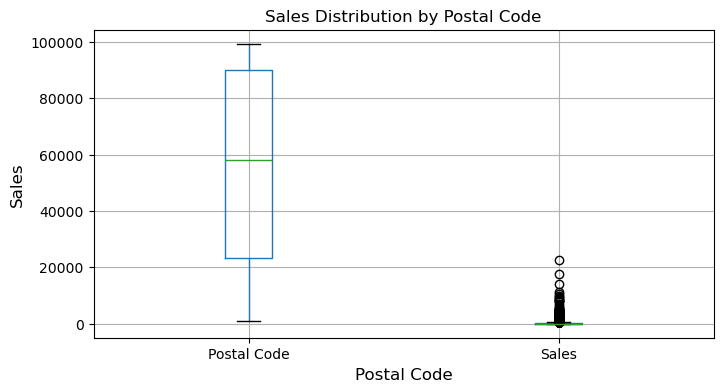

In [152]:
plt.figure(figsize=(8, 4))
sales_data_cleaned.boxplot(column=['Postal Code','Sales'])
plt.title('Sales Distribution by Postal Code', fontsize=12)
plt.xlabel('Postal Code', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.show()


In [168]:
sales_data_cleaned['Postal Code']

0       42420.0
1       42420.0
2       90036.0
3       33311.0
4       33311.0
         ...   
9795    60610.0
9796    43615.0
9797    43615.0
9798    43615.0
9799    43615.0
Name: Postal Code, Length: 9789, dtype: float64

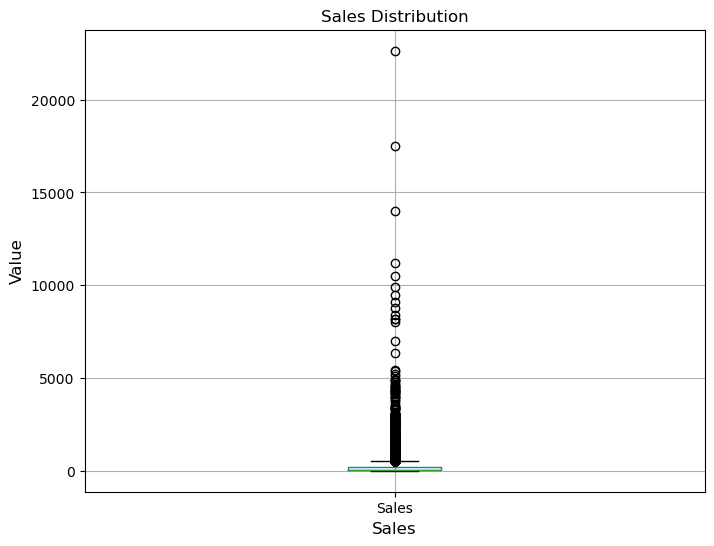

In [170]:
# Create a boxplot for the 'Sales' column
plt.figure(figsize=(8, 6))
sales_data_cleaned.boxplot(column=['Sales'])
plt.title('Sales Distribution', fontsize=12)
plt.xlabel('Sales', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.show()


In [179]:
##From the above boxplot, it's clear there are outliers in the sales column now I will try to get summary for this column.

In [181]:
sales_data_cleaned['Sales'].describe()

count     9789.000000
mean       230.116193
std        625.302079
min          0.444000
25%         17.248000
50%         54.384000
75%        210.392000
max      22638.480000
Name: Sales, dtype: float64

In [183]:
# knowing if there any ouliers values in sales and we noticed there is no outliers 
Q1=sales_data_cleaned['Sales'].quantile(0.25)
Q3= sales_data_cleaned['Sales'].quantile(0.75)
IQR=Q3-Q1
lower_bound= Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
outliers= sales_data_cleaned[(sales_data_cleaned['Sales']< lower_bound)| sales_data_cleaned['Sales']>upper_bound]
num_outliers= len(outliers)
print(num_outliers) 


0


In [185]:
sales_data_cleaned['Sales'].describe()


count     9789.000000
mean       230.116193
std        625.302079
min          0.444000
25%         17.248000
50%         54.384000
75%        210.392000
max      22638.480000
Name: Sales, dtype: float64

In [191]:
sales_data_cleaned.describe(include=['object'])


,Order ID,Customer ID,Customer Name,Country,City,State,Region,Product ID,Product Name
count,9789,9789,9789,9789,9789,9789,9789,9789,9789
unique,4916,793,793,1,529,48,4,1860,1848
top,CA-2018-100111,WB-21850,William Brown,United States,New York City,California,West,OFF-PA-10001970,Staple envelope
freq,14,35,35,9789,891,1946,3140,18,47


In [ ]:
# data visualize

In [225]:
grp_by_name = sales_data_cleaned.groupby('Product Name')['Sales'].sum()
top10 = grp_by_name.sort_values(ascending=False).head(10)
print(top10)

Product Name
Canon imageCLASS 2200 Advanced Copier                                          61599.824
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind    27453.384
Cisco TelePresence System EX90 Videoconferencing Unit                          22638.480
HON 5400 Series Task Chairs for Big and Tall                                   21870.576
GBC DocuBind TL300 Electric Binding System                                     19823.479
GBC Ibimaster 500 Manual ProClick Binding System                               19024.500
Hewlett Packard LaserJet 3310 Copier                                           18839.686
HP Designjet T520 Inkjet Large Format Printer - 24" Color                      18374.895
GBC DocuBind P400 Electric Binding System                                      17965.068
High Speed Automatic Electric Letter Opener                                    17030.312
Name: Sales, dtype: float64


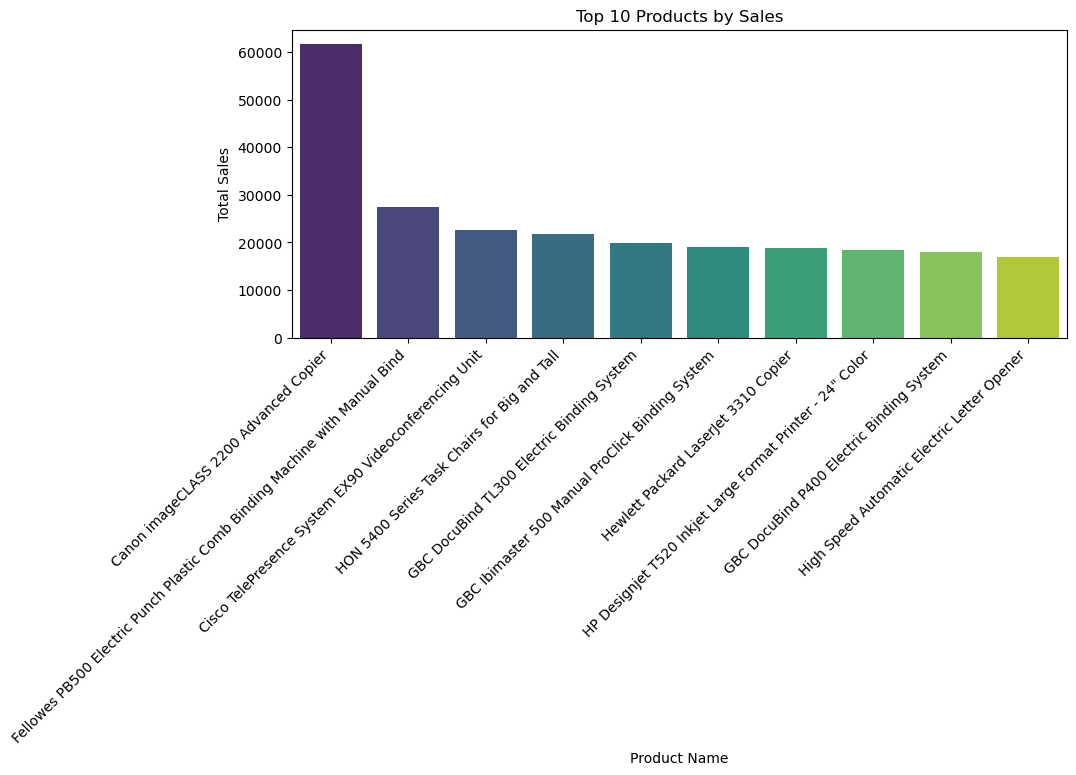

In [264]:
plt.figure(figsize=(10, 4))
sns.barplot(x=top10.index, y=top10.values, hue=top10.index, palette='viridis', legend=False)
plt.title('Top 10 Products by Sales', fontsize=12)
plt.ylabel('Total Sales', fontsize=10)
plt.xlabel('Product Name', fontsize=10)
plt.xticks(rotation=45, ha='right')  

# Show the plot
plt.show()


In [272]:

customer_segments = sales_data_cleaned.groupby('Segment', observed=False)['Sales'].sum().round(5)
print("Sales by Customer Segments:\n")
print(customer_segments)


Sales by Customer Segments:

Segment
Consumer       1.146708e+06
Corporate      6.822118e+05
Home Office    4.236874e+05
Name: Sales, dtype: float64


In [294]:
sales_data_cleaned['Year'] = sales_data_cleaned['Order Date'].dt.year
yearly_sales = sales_data_cleaned.groupby('Year')['Sales'].sum()
yearly_sales

Year
2015    479856.2081
2016    454315.9054
2017    597225.4900
2018    721209.8092
Name: Sales, dtype: float64

([<matplotlib.axis.XTick at 0x1187f27aab0>,
 [Text(2015, 0, '2015'),
  Text(2016, 0, '2016'),
  Text(2017, 0, '2017'),
  Text(2018, 0, '2018')])

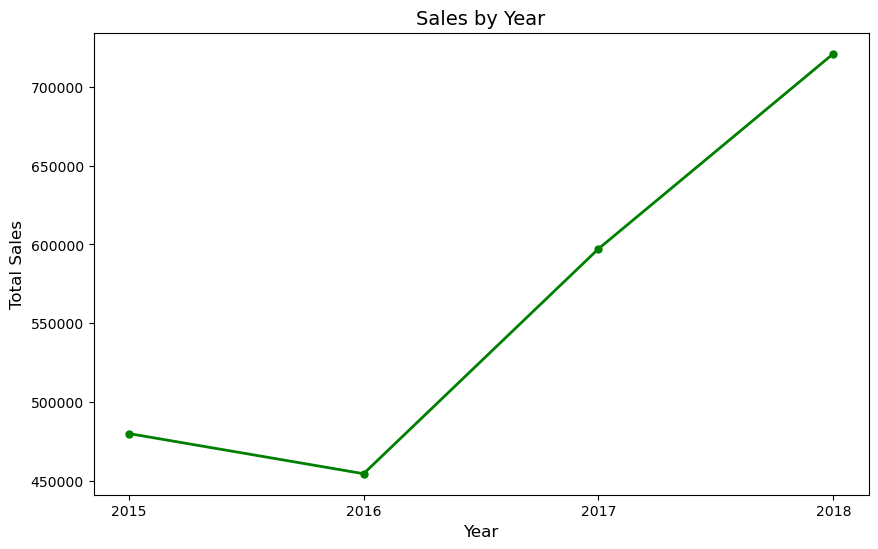

In [296]:
plt.figure(figsize=(10, 6))
plt.plot(yearly_sales.index, yearly_sales.values, marker='o', color='g', linestyle='-', linewidth=2, markersize=5)
plt.title('Sales by Year', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(yearly_sales.index) 

In [290]:
sales_data_cleaned=sales_data_cleaned.copy()
sales_data_cleaned['Month-Year']=sales_data_cleaned['Order Date'].dt.to_period('M')
monthly_sales= sales_data_cleaned.groupby('Month-Year')['Sales'].sum()
print(monthly_sales)


Month-Year
2015-01     14205.7070
2015-02      4519.8920
2015-03     55205.7970
2015-04     27906.8550
2015-05     23644.3030
2015-06     34322.9356
2015-07     33781.5430
2015-08     27117.5365
2015-09     81623.5268
2015-10     31453.3930
2015-11     77907.6607
2015-12     68167.0585
2016-01     18066.9576
2016-02     11951.4110
2016-03     32339.3184
2016-04     34154.4685
2016-05     29959.5305
2016-06     23599.3740
2016-07     28608.2590
2016-08     36818.3422
2016-09     63133.6060
2016-10     31011.7375
2016-11     70129.2995
2016-12     74543.6012
2017-01     16870.1810
2017-02     22978.8150
2017-03     51165.0590
2017-04     37385.0170
2017-05     56656.9080
2017-06     39724.4860
2017-07     38320.7830
2017-08     30542.2003
2017-09     69193.3909
2017-10     59583.0330
2017-11     79066.4958
2017-12     95739.1210
2018-01     42839.2940
2018-02     19920.9974
2018-03     58863.4128
2018-04     35541.9101
2018-05     43825.9822
2018-06     48190.7277
2018-07     44825.1040


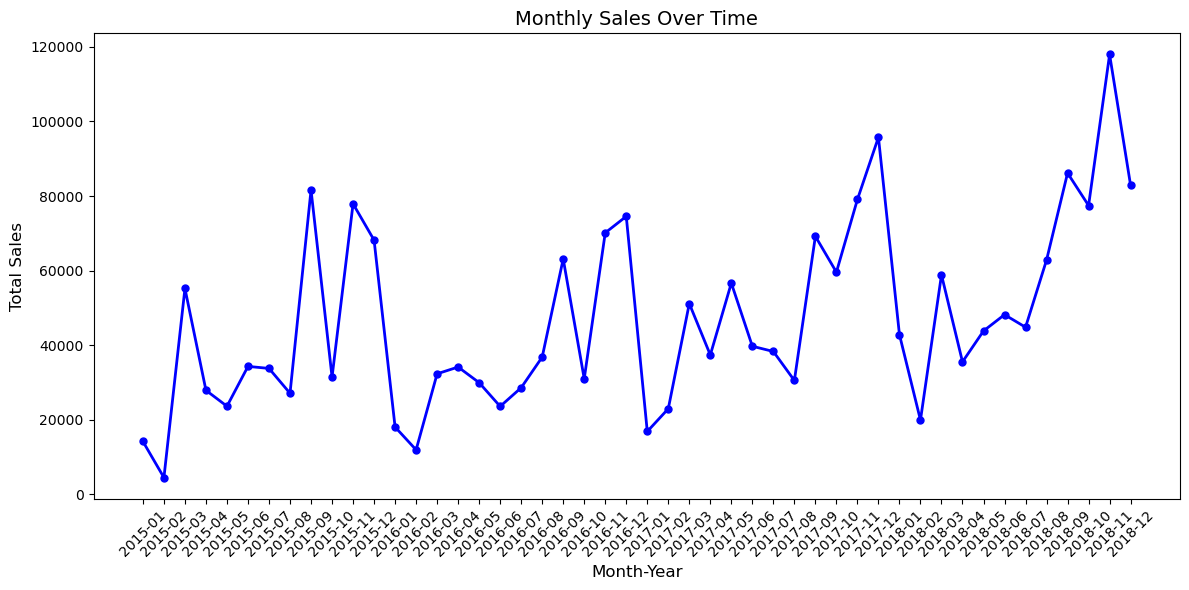

In [292]:
plt.figure(figsize=(12, 6))

# Plot the monthly sales
plt.plot(monthly_sales.index.astype(str), monthly_sales.values, marker='o', color='b', linestyle='-', linewidth=2, markersize=5)

# Add labels and title
plt.title('Monthly Sales Over Time', fontsize=14)
plt.xlabel('Month-Year', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(rotation=45)  # Rotate the x-axis labels for readability

# Show the plot
plt.tight_layout()
plt.show()

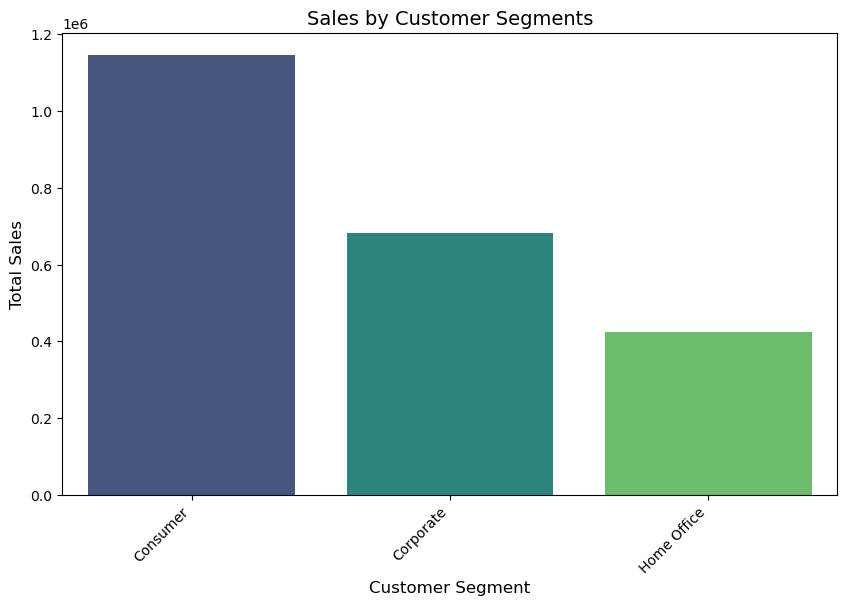

In [278]:
plt.figure(figsize=(10, 6))
sns.barplot(x=customer_segments.index, y=customer_segments.values,hue=customer_segments.index, palette='viridis', legend=False)

# Add labels and title
plt.title('Sales by Customer Segments', fontsize=14)
plt.xlabel('Customer Segment', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate the segment names for better readability

# Show the plot
plt.show()

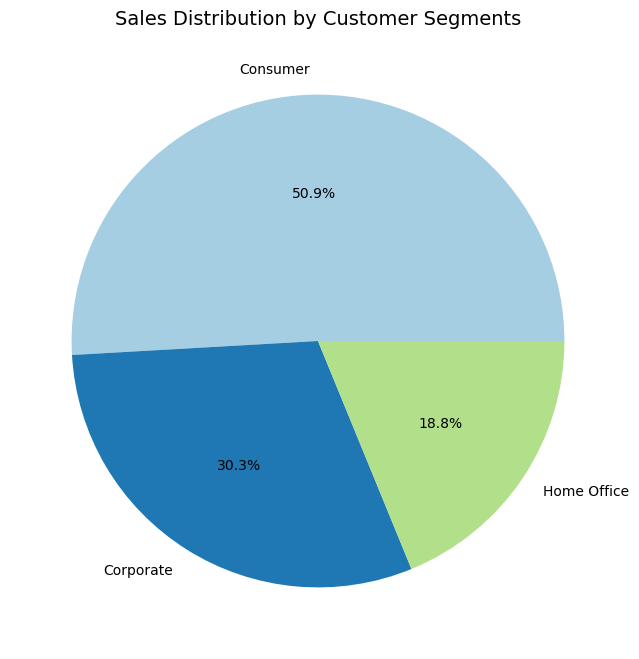

In [284]:
plt.figure(figsize=(8, 8))
plt.pie(customer_segments, labels=customer_segments.index, autopct='%1.1f%%', colors=plt.cm.Paired.colors)
plt.title('Sales Distribution by Customer Segments', fontsize=14)
plt.show()

In [298]:
sales_by_region = sales_data_cleaned.groupby('Region')['Sales'].sum().round(2)
print(sales_by_region)

Region
Central    492646.91
East       660589.36
South      389151.46
West       710219.68
Name: Sales, dtype: float64


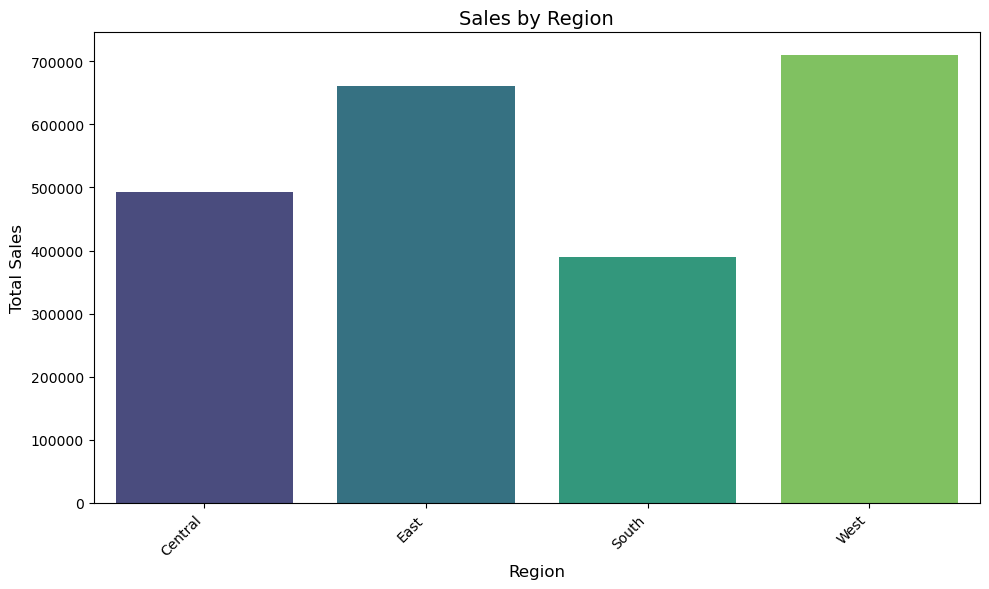

In [302]:
plt.figure(figsize=(10, 6))
sns.barplot(x=sales_by_region.index, y=sales_by_region.values, hue=sales_by_region.index, palette='viridis', legend=False)
plt.title('Sales by Region', fontsize=14)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate the region names for better readability
plt.tight_layout()
plt.show()

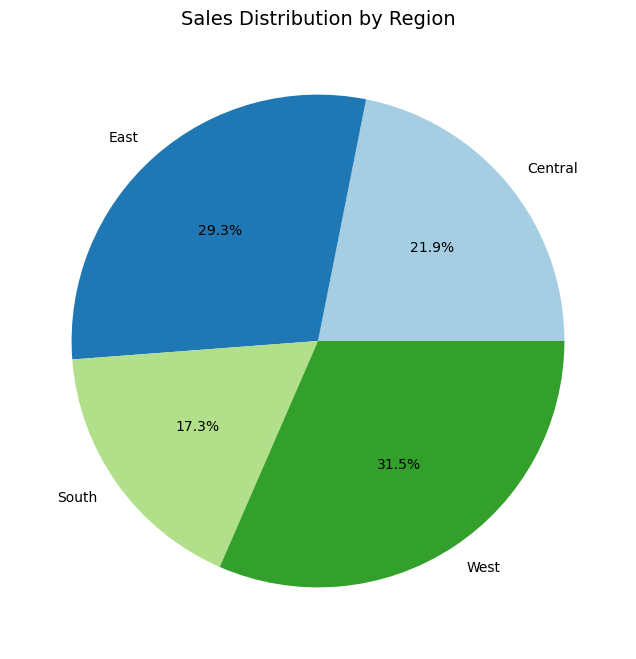

In [304]:
sales_by_region = sales_data_cleaned.groupby('Region')['Sales'].sum().round(2)

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(sales_by_region, labels=sales_by_region.index, autopct='%1.1f%%', colors=plt.cm.Paired.colors)

# Add a title
plt.title('Sales Distribution by Region', fontsize=14)

# Show the pie chart
plt.show()


In [363]:
low_products=top10.head(10)
print("Bottom 10 products by Sales:")
print(low_products)


Bottom 10 products by Sales:
Product Name
Canon imageCLASS 2200 Advanced Copier                                          61599.824
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind    27453.384
Cisco TelePresence System EX90 Videoconferencing Unit                          22638.480
HON 5400 Series Task Chairs for Big and Tall                                   21870.576
GBC DocuBind TL300 Electric Binding System                                     19823.479
GBC Ibimaster 500 Manual ProClick Binding System                               19024.500
Hewlett Packard LaserJet 3310 Copier                                           18839.686
HP Designjet T520 Inkjet Large Format Printer - 24" Color                      18374.895
GBC DocuBind P400 Electric Binding System                                      17965.068
High Speed Automatic Electric Letter Opener                                    17030.312
Name: Sales, dtype: float64


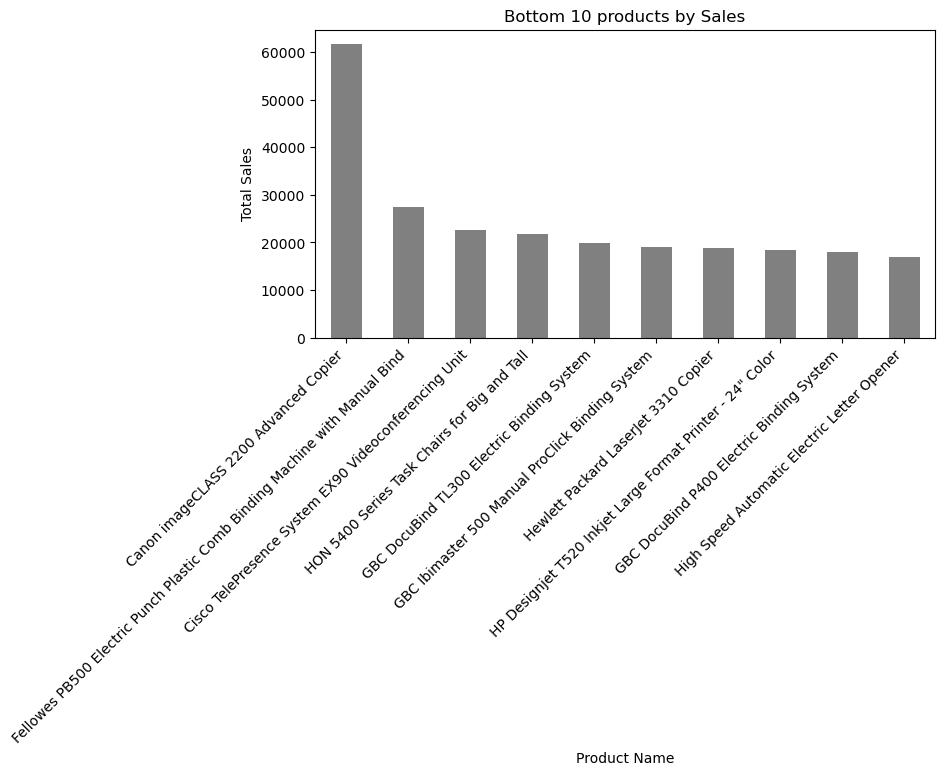

In [359]:
low_products.plot(kind='bar',figsize=(8,4),color='gray')
plt.title("Bottom 10 products by Sales")
plt.ylabel("Total Sales")
plt.xlabel("Product Name")
plt.xticks(rotation= 45,ha='right')
plt.show()


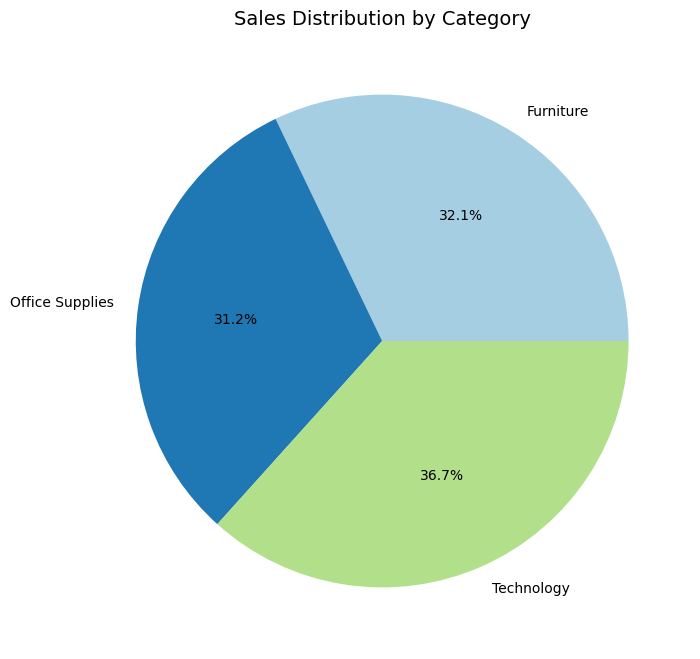

In [348]:
sales_by_category = sales_data_cleaned.groupby('Category', observed=False)['Sales'].sum()
plt.figure(figsize=(8, 8))
plt.pie(sales_by_category, labels=sales_by_category.index, autopct='%1.1f%%', colors=plt.cm.Paired.colors)
plt.title('Sales Distribution by Category', fontsize=14)
plt.show()
